<a href="https://colab.research.google.com/github/manjirikulkarni03/Rossmann_Sales_Prediction/blob/main/Retail_Sales_prediction_Manjiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Sales Prediction : Predicting sales of a major store chain Rossmann



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 - Prasad Wagh**
##### **Team Member 2 -Manjiri Kulkarni**
##### **Team Member 3 -Ajay Pandey**
##### **Team Member 4 -Shahrukh Ahmad**
##### **Team Member 5 -Ashi Saxena**

# **Project Summary -**

**Rossman Sales Prediction** data contains historical sales data for a retail store chain. The data includes information about the store such as Competitior’s Detail, holiday’s, number of the customers, sale transaction's date and amount of sale on each day. We were tasked **to forecast the "Sales"** for the test set.

After understanding the data and getting variables, we first gathered and **cleaned the data, handled the null values** and finally for getting better results we **merged** two datasets after that we have also typecasted the needed features into required format by **type casting** in order to visualize them properly. We performed indepth **EDA** and plotted different types of graphs by separating them into univariate, bivariate and multivariate categories as a result, We came accross some meaningful insights that helped us to make future decisions of ML model pipeline. Then further on, using **feature engineering** and data preprocessing  we have extracted new features like PromoDuration and CompetitionDuration with the help of some features which are not directly impacting to Sales. We also tried to get some impacting features by removing **multicollinearity** within the independent variables with the help of **various inflation factor(VIF)**. Under the umbrella of feature engineering we have detected and treated the outliers with the help of **IQR technique** and capped all the outliers of continous features in 25-75 percentile. Also, we noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings).So, we have encoded them into numericals using **One-Hot Encoding technique** as they were unordered in nature. 

In order to get normally distributed data we have applied various **transformation techniques** such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and some others as well and plotted the quantie-quantile plot to visualize how far our data points are from the normal distribution.To scale the data We used the sklearn library **StandardScaler**.

Now as we are ready with our final features we **splitted** it into training and testing sets. Next, we choose some **machine learning algorithms** and use the training data to train the model. Finally, we evaluated the model's performance on the testing data to see how well it is able to predict the sales for the real time data. For this task we used many machine learning algorithms, such as **linear regression, decision trees, random forests, LightGBM and XGboost**. For the less complex models like **Linear Regression**, we could achieve the **r2 score of 0.75** and **accuracy i.e 100-MAPE of 93%** even after applying regularisation techniques such as Lasso,Ridge and Elstic Net. In order to capture **more variance** and train our model more aptly, we decided to go for **more complex models** one by one. After training our datasets on decision trees, random forests, LightGBM and XGboost, we could gather the **r2 score of 0.94** with the best **accuracy of 97% using XGboost** with mean absolute percentage error of only 2%. Also we got the mean of residuals as 0.0 which is indicating towards perfectly normally distributed residuals which is one of the good characteristics of good residual plot. From the above experiments and identifications, we have choosen the **XGboost** as our **final optimal model** among all 5 models for deployment as it is predicting the highest accuracy with the least error.

Overall, while building a machine learning model on Rossman Sales Prediction Data, we applied combination of **data processing, machine learning techniques, and model evaluation skills.** It was a challenging task and we faced some failures as well but with the right approach and knowledge, we successfully created a model that can accurately predict sales upto six weeks in advance!



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

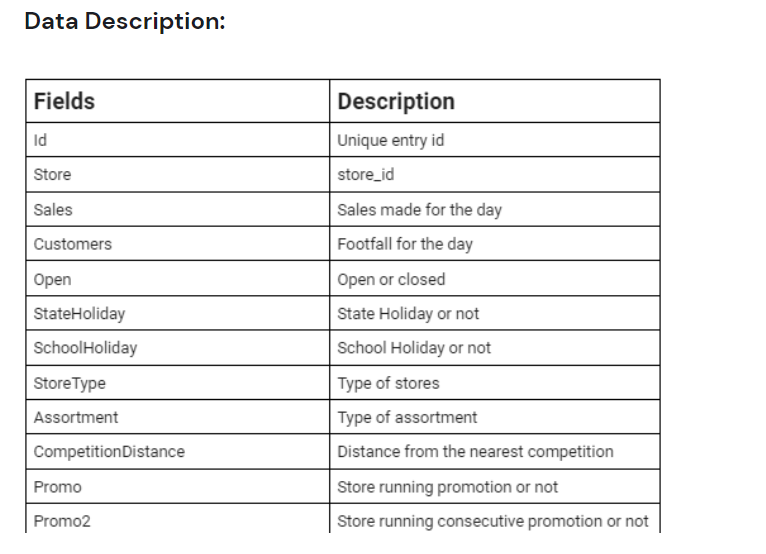

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset

df_rossmann= pd.read_csv("/content/drive/MyDrive/Data & Resources/Rossmann Stores Data.csv")
df_store= pd.read_csv("/content/drive/MyDrive/Data & Resources/store.csv")

### Dataset First View

In [ ]:
# Dataset First Look of rossmann dataset
df_rossmann.head()

In [ ]:
# Dataset First Look of store dataset
df_store.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rossmann dataset: Rows={df_rossmann.shape[0]}, Columns={df_rossmann.shape[1]}") 
print(f"Store dataset: Rows={df_store.shape[0]}, Columns={df_store.shape[1]}") 

### Dataset Information

In [ ]:
# Rossmann Dataset Info
df_rossmann.info()

In [ ]:
# Store Dataset Info
df_store.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {df_rossmann.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {df_store.duplicated().sum()}")

We do not have any duplicated rows in both the dataset and that is very good for us.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print(f"Null values count in Rossmann dataset:\n{df_rossmann.isna().sum()}\n")
print("-"*50)
print(f"Null values count in Store dataset:\n{df_store.isna().sum()}")
print("-"*50)
print(f"Infinite values count in Rossmann dataset:\n{df_rossmann.isin([np.inf, -np.inf]).sum()}\n")
print("-"*50)
print(f"Infinite values count in Store dataset:\n{df_store.isin([np.inf, -np.inf]).sum()}")
print("-"*50)

We don't have null or infinite values Rossmann's dataset but have some null values in Store dataset and we have to deal with it in future.

In [ ]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:green")

In [ ]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="tomato")

### What did you know about your dataset?

Till now we get to know the following points about our dataset:
1. **'Rossmann dataset'** is having **1017209 rows and 9 columns** and does not have any null value.
2. **'Stores dataset'** is having **1115 rows and 10 columns**. It contains null values in total six features viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval. 
3. There are **no duplicate** values present in both the datasets.
4. There are total 4 **categorical features** in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Column names of Rossmann dataset is:\n{df_rossmann.columns.tolist()}")
print(f"Column names of Store dataset is:\n{df_store.columns.tolist()}")

In [ ]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

In [ ]:
# Store dataset describe
df_store.describe(include="all")

### Variables Description 

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday.

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_rossmann.columns.tolist():
  print("The Unique Values of', i, 'are:", df_rossmann[i].unique())

In [ ]:
# Check Unique Values for each variable.
for j in df_store.columns.tolist():
  print("The Unique Values of', j, 'are:", df_store[j].unique())

## 3. ***Data Wrangling***

####1. Null values treatment

 ##### a). Handling null values from **CompetitionDistance** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()]

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

In order to fill the null values of CompetitionDistance we have 4 options:
1. Zero(0) >> Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. Median >> To get good results replacing with median can be a better choice.
4. Mode >> Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

In [ ]:
# filling null values
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].median(), inplace=True)

In [ ]:
# rechecking if we have any further null values in CompetitionDistance feature
df_store[df_store["CompetitionDistance"].isnull()].sum()

In [ ]:
# rechecking if we have any null values
df_store.info()

Hurray!!  We do not have any further null values in CompetitionDistance feature.

##### b). Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [ ]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
df_store[df_store["CompetitionOpenSinceMonth"].isnull()]

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df_store["CompetitionOpenSinceMonth"])

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df_store["CompetitionOpenSinceYear"])

Filling null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with Mode.

In [ ]:
# filling null values of CompetitionOpenSinceMonth
df_store["CompetitionOpenSinceMonth"].fillna(df_store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [ ]:
# filling null values of CompetitionOpenSinceYear
df_store["CompetitionOpenSinceYear"].fillna(df_store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [ ]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df_store.info()

##### c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval** feature.

Since corresponding value where Promo2 is 0 for features Promo2SinceWeek, Promo2SinceYear and PromoInterval having null values. So, we are replacing null values with 0.

In [ ]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
df_store["Promo2SinceWeek"].fillna(0, inplace=True)
df_store["Promo2SinceYear"].fillna(0, inplace=True)
df_store["PromoInterval"].fillna(0, inplace=True)

In [ ]:
# rechecking if our features contains more null values
df_store.info()

Congratulations we have achieved our first milestone by cleaning up all the null/missing values from both the datasets.

#### 2. Merging datasets

In [ ]:
# checking shape of dataset using left join
df_left= pd.merge(df_rossmann, df_store, on="Store", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df_left.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(df_rossmann, df_store, on="Store", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


# checking shape of dataset using inner join
df_inner= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df_inner.shape)
print(f"Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}")

# checking shape of dataset using outer join
df_outer= pd.merge(df_rossmann, df_store, on="Store", how= "outer")
print(df_outer.shape)
print(f"Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}")

Since, we are obtaining the same shape and 0 null values from all the joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

In [ ]:
#using inner join for our further analysis
df= pd.merge(df_rossmann, df_store, on="Store", how= "inner")
print(df.shape)

In [ ]:
#checking info of our final merged dataset
df.info()

#### 3. Typecasting

In [ ]:
# Checking dtypes of all the variables of the dataframe
df.info()

In [ ]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [ ]:
# Verifying the dtypes
df.info()

### What all manipulations have you done and insights you found?

In data wrangling we have divided it into three sections:


1.   **Null values treatment**: In this section we have treated all the null values from both the datasets. We did the following replacements:


> a. Replaced null values of CompetitionDistance with MEDIAN.

> b. Replaced null values of CompetitionOpenSinceMonth and with MODE.

> c. Replaced null values of CompetitionOpenSinceYear and with MODE.

> d. Replaced null values of Promo2SinceWeek and with 0. 

> e. Replaced null values of Promo2SinceYear and with 0.

> f. Replaced null values of PromoInterval and with 0.


2.   **Merging datasets**: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.

3.   **Typecasting**: In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:


> a. Typecasted the Date feature to Datetime format.

> b. Typecasted the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear feature to Integer.












## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

As some stores in the dataset were temporarily closed due to refurbishment and they won't provide us any information , so we will not consider those store which were closed . We will remove those rows where stores were closed .

In [ ]:
# Considering those rows where stores are open and sales are not zero. 
df = df[(df['Open']==1) & (df['Sales']!=0)]            

# Now since every store in our dataset are opened , we don't need 'Open' column and we will drop this column
df.drop(['Open'],axis=1,inplace=True)

In [ ]:
df.info()

Now we will do data visualization in an structured way following ' UBM ' rule

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

###**Univariate Analysis**

####**Chart-1: Checking frequency distribution of continous features-Sales, CompetitionDistance, Customers:**

In [ ]:
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Green", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Green", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of Customers',size = 15)


##### 1. Why did you pick the specific chart?

We picked this chart as it shows whether the observations are high or low and also whether they are concentrated in one area or spread out across the entire scale for continous features only.

##### 2. What is/are the insight(s) found from the chart?

1. Avarage Sales value is under 1000 and graph is rightly skewed, which shows most of the stores are open where the middle class resides.

2. We can clearly observe that most of the stores have their competition within 
   5Km range which indicates mostly competiting stores are located nearby to   each other.

3. Avarage number of customer visiting stores is 1000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. As we can see most of the sales are under 1000, to expand their business and sales they should **open their stores in posh area** or where the upper class lives.

2. We plotted frequency distribution graph for sales, customer and competition distance with the help of which we came to know that many competiting stores are densly located. so, business should **plan different strategies** to sustain in the competitive market.

####**Chart-2: Checking frequency distribution of continous features-SchoolHoliday, Promo, Promo2:**

In [ ]:
#Lets check distribution for Some discrete features(SchoolHoliday,Promo,Promo2):
labels = 'Not SchoolHoliday' , 'SchoolHoliday'
sizes = df.SchoolHoliday.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of School Holiday",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo' , 'Not Promo'
sizes = df.Promo.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of promoted stores",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo2' , 'Not Promo2'
sizes = df.Promo2.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of stores who are into continuous promotion",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

##### 1. Why did you pick the specific chart?

We choose the pie chart as it represents the contribution of each part of the data to a whole where the arc size of each slice is directly proportional to the contribution of that part. 

##### 2. What is/are the insight(s) found from the chart?

1.From first pie chart We can say that market will observe approx 20% of school Holidays.

2.We see that 44.6% of stores are into promotions and 55.4% of stores are not into promotions .The reason that more stores are not into promotions may be they don't have the enough budget or they may not see enough need for promotions.

3.From Third chart we can infer that there is almost equal percentage of stores getting promoted and the one which are not getting promoted.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. From above pie chart we understood that percentage of stores getting promoted is more than non promoting stores but sales are positively correlated to promo meaning **if stores are getting promoted sale is increasing**. So, business should try promoting the stores to increase the revenue.
2. Later we will see if their is any impact of School holiday on sale on sale.

####**Chart-3: Checking frequency distribution of Storetype, Assortment, Stateholiday and Promointervals:**

In [ ]:
# Store type and assortment 
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
ax=sns.countplot(df['StoreType'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['StoreType']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(2,2,2)
ax=sns.countplot(df['Assortment'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(2,2,3)
ax=sns.countplot(df['StateHoliday'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.subplot(2,2,4)
ax=sns.countplot(df['PromoInterval'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}%'.format(100 * p.get_height()/float(len(df['Assortment']))), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

We plotted above graph to know the distribution of different type of stores,assortment,state holiday and promointerval in the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. Store **Type "a"** is most common and **Store Type "b"** is rare in the dataset . 

2. **Most of the stores have assortment "a" and assortment "b" is very rare** .
Since there is significant diffference in the number of occurrence of different store types and assortments , it could indicate that certain store types and assortments are more successful or profitable than others .It could also suggest that **certain store types and assortments are more suited to certain types of stores or locations.**

3. We can infer that many stores are planning to get prmoted in first quarter of promointerval while number of stores getting promoted in successive quartes is **decreasing gradually**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

<!-- Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, marketing tactics of store type 'b'. -->

As we can see that store type_a , assortment_a is highest and storetype_b , assortment_b is lowest in number. So it's quite intersting to see weather these assortments and stores will also get the **heighest sale in bivariate analysis also!!!**

####**Chart-4: Checking frequency distribution of Promo2:**

In [ ]:
# Promo 2 since weeks
plt.figure(figsize=(20,8))

ax=sns.countplot(df['Promo2SinceWeek'],palette='Set2',edgecolor='black')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

To see since how many weeks the stores have been praticipating in Promo2 .

##### 2. What is/are the insight(s) found from the chart?


In this countplot, we can see that 0 has the greatest count . 0 indicates the stores are not participating in promo2  and rest all count indicate the numbers of count of stores , since how many week they have been participating in promo 2.One possibility that stores are not continuing participating in the promo might be **customers are less responsive to a second promotion**, as they may have already taken advantage of a similar promotion earlier. Another possibility is that the store may not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above graph we can infer that many stores are not continuing participating in the promo which indicates the **promotions are not meeting the required targets.**

###**Bivariate Analysis**

#### **Chart-1: Sales vs DayOfWeek**

In [ ]:
# Sales Vs DayOfWeek
plt.figure(figsize=(13,7))
plots=sns.barplot(x=df['DayOfWeek'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We used **bar plots** because they are a useful tool for visualizing and understanding **categorical data**, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Day 1 and 7 have good number of sales so we can **hire more staff specially for these days** and delivery boys for more revenue.
2. Since only 2 days are witnessing good sales, store can **target remaining 5 days in a week to milk more revenue**. It can run exciting offers and attract more customers on weekdays to generate more revenue.

#### **Chart-2: Sales vs Year**

In [ ]:
# Sales vs Year
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df["Date"].dt.year,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of sales in 2013, 2014 and 2015. Count plots can help us understand how the values of a variable are distributed within the dataset. 


##### 2. What is/are the insight(s) found from the chart?

For any business, year-on-year sales growth is a good parameter to access the store growth. Here we can observe that even though sales are increasing year-on-year, **sales growth is not even 10%**. So the owners need to put extra efforts to increase the yearly sales.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights from this graph are actually very important for the owners. Since the growth is not at very commendable pace, they need to **target more customers and bring some changes in the operations.**

#### **Chart-3: Sales vs Month**

In [ ]:
# Month vs sales
plt.figure(figsize=(18,7))
plots=sns.barplot(x=df['Date'].dt.month,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Month")

plt.show()

##### 1. Why did you pick the specific chart?

To know the patterns or trends in the data, such as a **peak in activity or sales during a particular month of the year.**

##### 2. What is/are the insight(s) found from the chart?

The countplot highlights that **December being a festive month** attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the **'Black Friday'** sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely these insights create a positive business impact as business owners will try to **keep more goods to cater with the business needs** and also they can increase the revenue by keeping **stores open even on weekends or holidays** as customers are aiming to buy more in this period of month.

#### **Chart-4: Sales vs Customer**

In [ ]:
# Sale Vs Customer
plt.figure(figsize=(7,7))
sns.scatterplot(df['Customers'],df['Sales'])

##### 1. Why did you pick the specific chart?

We chose scatter plot because we wanted to plot the relationship between the number of customers visiting the store and the total sales.They are useful for identifying outliers in the data, as well as to determine the correlation between two variables,and to verify the linear trend of our dataset.

##### 2. What is/are the insight(s) found from the chart?

This above scatterplot show a **positive correlation between 'Sales' and 'Customers'**. As the number of customers increases, the sales also tend to increase. We understood from the above trend that our data shows linear trend between these two variables - customers and sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers and sales are directly proportional to each other and are highly correlated. It can help businesses to promote their strategies using **marketing campaigns, advertisements** to attract more customers ultimately shooting up the sales.

#### **Chart-5: Sales vs Promo**

In [ ]:
# Sales vs Promo
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Promo'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of how many sales were made at stores that were running promotions and how many were made at stores that were not running promotions. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see the **effectiveness of promotions on increasing sales**. So we can infer that as the stores are getting promoted, sales are increasing on large basis showing positive correlation between promo and sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Business owners should try to **promote the stores** to sustain in the market eventually resulting increment in the sales amount.

#### **Chart-6: Sales vs StateHoliday**

In [ ]:
# Sales vs StateHoliday
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StateHoliday'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

To know the number of sales for various State Holidays .

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we observe that sales are highest for state holiday 'B' followed by state holiday 'C'. One interesting insight here is **sales are comparitively low during normal days**(i.e with no state holiday).The factors that contribute to higher sales on these holidays could be increased consumer spending, special promotions or events.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The business can create special offers or bundle products to increase the sales during the religious festivals.

#### **Chart-7: Sales vs SchoolHoliday**

In [ ]:
# Sales vs SchoolHoliday

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['SchoolHoliday'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of how many sales were made at stores on school holiday and on non-school holiday .

##### 2. What is/are the insight(s) found from the chart?

We can see there is **not much difference in sales**. However,sales is more on school holidays . It is possible that school holidays are more likely to be associated with families going on vacation or parents taking time off work to spend with their children, which could lead to increase in consumer spendings. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from the graph, it is not making much difference whether there is school holiday or not. Still, businesses can target school holidays and run more promotional offers.

#### **Chart-8: Sales vs StoreType**

In [ ]:
# Sales vs StoreType
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

To know which kind of store is able to generate maximum profit.

##### 2. What is/are the insight(s) found from the chart?

1. Sales for the store type b is the highest . **Store type B might be located in a more affluent or high-traffic area**, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.

2. Earlier we have drawn the univeriate graph of Store type to know which type of store are more in numbers, and we found that store type a,c,d are more but this is not the case with the sales even though **storetype_b are less still they are making more profit**.

3. It might be the case that store type_b contain **costly**, **luxerious items**.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, **marketing tactics of store type 'b'.**

2. Company should **open stores of type_b** to gain more profit.

#### **Chart-9: Sales vs Assortment**

In [ ]:
# Sales vs Assortment
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Assortment'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

To know the Sales for various Assortments or which assortment is beneficial for more profit.

##### 2. What is/are the insight(s) found from the chart?

1. Earlier we have seen that **assortment_B are less in numbers compared to a,b,c** but with the help of Bivariate graph we can see that assortment_B caters the maximum amount of sales.

2. Sales are highest for the assortment b . This assortment may have a good mix of **products that are in high demand or that are unique to the store**, which would result in more sales.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since sales are highest for assortment 'b', Rossman owners can **target more on this specific combination** and reduce the dependency on assortment 'a' and assortment 'c'. **This could surely be a cost effective move**.

#### **Chart-10: Sales vs CompetitionDistance**

In [ ]:
# Sales Vs CompetitionDistance
plt.figure(figsize=(7,7))
sns.scatterplot(df['CompetitionDistance'],df['Sales'])

##### 1. Why did you pick the specific chart?

To know the relationship between the sales and competition distance.

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see sales are more for densely located stores.So, stores can continue providing exciting offers and services to attract customers to compete the market. 

#### **Chart-11: Sales vs CompetitionOpenSinceYear**

In [ ]:
# Sale Vs CompetitionOpenSinceYear
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

To know the average sales for each year since a competitor opened near the store .

##### 2. What is/are the insight(s) found from the chart?

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since almost every subsequent year reports sudden drop/rise in the sales, owners need to work on their stockings and marketing tactics. The basic reason for this sudden change could be explored more deeply and a plausible solution to it can be reached.

#### **Chart-12: Sales vs Promo2**

In [ ]:
# Sales vs Promo2

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['Promo2'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of sales with presence and absence of promo2.

##### 2. What is/are the insight(s) found from the chart?

The barplot shows that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights are indeed helpful as they are highlighting one of the most important thing about consecutive promotions. Clearly, such promotions are not enough to convert customers into buyers. The store needs to come up with more innovative and more rewardful solutions.

#### **Chart-13: Sales vs Promo2SinceYear**

In [ ]:
# Sales vs Promo2SinceYear

plt.figure(figsize=(10,7))

plots=sns.barplot(x=df['Promo2SinceYear'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

To know the sale count for various years since the promo2 started.

##### 2. What is/are the insight(s) found from the chart?

This barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights are indeed helpful as they are highlighting one of the most important thing about consecutive promotions. Clearly, such promotions are not enough to convert customers into buyers. The store needs to come up with more innovative and more rewardful solutions.

#### **Chart-14:  Sales vs PromoInterval**

In [ ]:
# Sales vs PromoInterval

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['PromoInterval'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')    
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of sale for various promo interval .

##### 2. What is/are the insight(s) found from the chart?

This barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. Here, we can see the promo interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season. However, the other intervals are recording sales that are close to the 1st interval.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Business needs to design the pattern of the promotion as sales are decreasing gradually from begining with first quarter of promo interval.

### **Multivariate Analysis**

#### **Chart-1 Pair Plot**

In [ ]:
# # Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

It can give multiple visual aids in a single frame and various insights related to the data can be gained in one single look.

##### 2. What is/are the insight(s) found from the chart?

Pairplot helped us to visualize the relationship between sales and other variables, such as customers, Promotions, competition, and school holidays Columns. This helped us to identify which variables might be useful for predicting sales and inform the design for our machine learning model.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.By plotting pairplt we got to know which features are impacting more on sales aiming for maximum sales.

#### **Chart-2 Correlation Heatmap**

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot= True,cmap=sns.color_palette('Pastel1'),square=True)
plt.title('Correlation Heatmap for Playstore data and User review data', size=20)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1- Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

2- Null Hypothesis - There is no relation between DayOfWeek and Sales

Alternate Hypothesis - There is a relation between DayOfWeek and Sales

3- Null Hypothesis - There is no relation between SchoolHoliday and Sales

Alternate Hypothesis - There is a relation between SchoolHoliday and Sales

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Customers"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data. 

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.939 which implies that theses two features are having strong positive correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between DayOfWeek and Sales

Alternate Hypothesis - There is a relationship between DayOfWeek and sales

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["DayOfWeek"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data. 

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on DayOfWeek and sales features we got Correlation coefficient as -0.221 which implies that theses two features are having weak negative correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between SchoolHoliday and Sales

Alternate Hypothesis - There is a relationship between SchoolHoliday and sales

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["SchoolHoliday"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data. 

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.334 which implies that theses two features are having weak positive correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
df.info()

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

In [ ]:
# checking outliers with the help of box plot for continous features
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

Below mentioned continous features with the percentage of outliers:

1. "Sales" - 2.62%
2. "Customers" - 3.75%
3. "CompetitionDistance" - 9.75%
4. "CompetitionOpenSinceMonth" - 1.22%
5. "CompetitionOpenSinceYear" - 2.71%

Let's define a function for the outlier treatment using IQR technique and cap the outliers in 25-75 percentile.

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  df[feature]= treat_outliers_iqr(df[feature])

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

### 3. Categorical Encoding

In [ ]:
# checking the features having dtype as object
df.info()

Clearly we have "StoreType", "Assortment", "PromoInterval" as "object". To feed them as an input of our Machine Learning algorithm, we need to use some encoding technique to make dtype of these column as "integer".

In [ ]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

From the above output we can see that the feature "StateHoliday" contains "0" as string and 0 as int at various observations. So let's convert "0"(str) to 0(int).

In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

Since we have several encoding techniques but the major ones are:
1. Ordinal encoding: Used when the features are ordinal in nature and have some rank between them.
2. Nominal encoding: Used when the features have equal weightage and are nominal in nature.

As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [ ]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
df_new=df.copy() 

In [ ]:
# Encode your categorical columns by dropping the first category
# df_new= pd.get_dummies(df, dtype=int)

We can use the above code to create binary dummy variable using ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So its better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier.

In [ ]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(df, dtype=int, drop_first=True)

In [ ]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [ ]:
# Let's see first five observations of our dataset
df_new.head()

In [ ]:
# Verifying the dtype
df_new.info()

#### What all categorical encoding techniques have you used & why did you use those techniques?

a. We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

b. Since, we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique than ordinal.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)
##### We don't have textual data in any of the feature so it is not needed for our project

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
## We don't have textual data in any of the feature so it is not needed for our project

#### 2. Lower Casing

In [ ]:
# Lower Casing
## We don't have textual data in any of the feature so it is not needed for our project

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
## We don't have textual data in any of the feature so it is not needed for our project

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
## We don't have textual data in any of the feature so it is not needed for our project

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
## We don't have textual data in any of the feature so it is not needed for our project

In [ ]:
# Remove White spaces
## We don't have textual data in any of the feature so it is not needed for our project

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
## We don't have textual data in any of the feature so it is not needed for our project

#### 7. Tokenization

In [ ]:
# Tokenization
## We don't have textual data in any of the feature so it is not needed for our project

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
## We don't have textual data in any of the feature so it is not needed for our project

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
## We don't have textual data in any of the feature so it is not needed for our project

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
## We don't have textual data in any of the feature so it is not needed for our project

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new 
# Checking the first five observation of the dataset we have to deal with.
df_new.head()

In [ ]:
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week

In [ ]:
#checking first 5 observations
df_new.head()

In [ ]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is involved in promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [ ]:
# checking first 5 observations after feature extraction
df_new.head()

#### 2. Feature Selection

In [ ]:
# Let's see how sales and other features are related
for col in df_new.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_new[col]
    label = df_new['Sales']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_new[col], df_new['Sales'], 1)
    y_hat = np.poly1d(z)(df_new[col])
    plt.plot(df_new[col], y_hat, "r--", lw=1)
    plt.show()

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df_new.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

Let's include only those features in our final dataframe that are highly impacting on the dependent variable i.e Sales. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:
1. "Sales" -> As it is target variable
2. "Store" -> As it is StoreID and not giving any information

We have extracted new features "CompetitionDuration" and "PromoDuration" from features "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year", "Week". So we can exclude them while calculating VIF.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Month", "Year", "Week"]]])

Since, "Promo2","PromoInterval_Jan,Apr,Jul,Oct", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" are having high VIF values and "PromoInterval_Jan,Apr,Jul,Oct" is having least corelation with "Sales". So, let's exclude "PromoInterval_Jan,Apr,Jul,Oct"

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct"]]])

Since "Assortment_b" and "Store_type_b" are also showing high corelation i.e 0.72 so we are gaining same information from both the features. Its better to exclude the feature "Assortment_b" which is having less corelation with Sales(0.047). 

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b"]]])

Since "Promo2" and "PromoDuration" are highly correlated having correlation 0.69 and "PromoDuration" is least correlated with "Sales". So, let's exclude "PromoDuration" from VIF.

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month","Week", "Year", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b","PromoDuration"]]])

Great !!! We are getting very good VIF's (Less then 10). Now let's move forward and store the selected features in a new dataframe.

In [ ]:
# New Dataframe which will be our final dataframe
final_df = df_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales"]]

In [ ]:
# Checking info of our final dataframe
final_df.info()

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed the following correlations:
1. **Positive Corelation**- Customers, Open, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.
2. **Negative Corelation**- DayOfWeek, StateHoliday, ComptitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek,Promo2SinceYear, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Day, CompetitionDuration.
3. **No Corelation**- Store, StoreType_c, StoreType_d

We have used **Filter method** with correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.

##### Which all features you found important and why?

We have selected "DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration" as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

In [ ]:
# Storing the continous variables(number of unique counts >40) in a separate list and treating them in order to make gaussian distribution
cont_variables= ["Sales", "Customers", "CompetitionDistance", "CompetitionDuration"]

In [ ]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

It is clear from above distribution plots that they are not perfectly normally distributed. So we will apply some transformation techniques to get the normally disrtibuted data as it is one of the prior underlying assumption for the linear models such as Linear Regression. 

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

As it is clear from above plots that our continous numeric features are not following perfectly normal distribution trend. So, now we will try various transformations techniques to get gaussian distributed curve.

Let's create different copies and check which transformation is best for each feature

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
test_df5=final_df.copy()

Logarithmic Transformation

In [ ]:
# Applying transformation on the above considered columns
test_df1['Sales']=np.log(test_df1['Sales']+1)
test_df1['Customers']=np.log(test_df1['Customers']+1)
test_df1['CompetitionDistance']=np.log(test_df1['CompetitionDistance']+1)
test_df1['CompetitionDuration']=np.log(test_df1['CompetitionDuration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

Reciprocal Trnasformation

In [ ]:
# Applying transformation on the above considered columns
test_df2['Sales']=1/(test_df2['Sales']+1)
test_df2['Customers']=1/(test_df2['Customers']+1)
test_df2['CompetitionDistance']=1/(test_df2['CompetitionDistance']+1)
test_df2['CompetitionDuration']=1/(test_df2['CompetitionDuration']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()

Square Root Transformation

In [ ]:
# Applying transformation on the above considered columns
test_df3['Sales']=(test_df3['Sales'])**(1/2)
test_df3['Customers']=(test_df3['Customers'])**(1/2)
test_df3['CompetitionDistance']=(test_df3['CompetitionDistance'])**(1/2)
test_df3['CompetitionDuration']=(test_df3['CompetitionDuration'])**(1/2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

Exponential Transformation

In [ ]:
# Applying transformation on the above considered columns
test_df4['Sales']=(test_df4['Sales'])**(1/1.2)
test_df4['Customers']=(test_df4['Customers'])**(1/1.2)
test_df4['CompetitionDistance']=(test_df4['CompetitionDistance'])**(1/1.2)
test_df4['CompetitionDuration']=(test_df4['CompetitionDuration'])**(1/1.2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)
plt.show()

From the above plots it is clear that:
1. Feature "Sales" needs square root transformation
2. Feature "Customers" needs square root transformation
3. Feature "CompetitionDistance" needs square root transformation
4. Feature "CompetitionDuration" no transformation needed

In [ ]:
# Applying transformation on the above considered columns
## Square root transformation
final_df['Sales']=(final_df['Sales'])**(1/2)
final_df['Customers']=(final_df['Customers'])**(1/2)
final_df['CompetitionDistance']=(final_df['CompetitionDistance'])**(1/2)

Now we have normally distributed data for all of the continous variables.

### 6. Data Scaling

Before scaling our data let's just seperate our "x" and "y" variables as we do not have to scale our y variable (Target variable).

In [ ]:
# Separating "x" and "y" variables
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating object
std_regressor= StandardScaler()

In [ ]:
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklearn library to scale our data.  This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# DImensionality Reduction (If needed)
## Not needed for now

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

In [ ]:
# DImensionality Reduction (If needed)
## Not needed for now

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

##### What data splitting ratio have you used and why? 

Since our dataset is huge and have nearly 10lakh obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# We have alreay excluded the closed stores for which the sales are 0. So, we do not have any imabalanced data with us.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not needed

## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

### ML Model - 1 - **Linear Regression**

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

In [ ]:
# Checking the intercept
linear_regressor.intercept_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

We have started with the most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metrics on both the train and test datesets so that we can conclude our ML model. Here for Linear Regression, we can observe that both the r2 scores for train and test datasets are pretty close which explains that on test dataset our model is following the correct way. 


We can comprehend that 'dependent' and 'independent' variables are not much following direct linear relationship with each other thats why we got 0.75 maximum r2 score in LR model implementation.

Also we are getting the Mean=0.03 and Median=-0.27 in our residual plot that resembles our predictions are closely following Normal Distribution (Mean=Median=0) because of this our accuracy (100-MAPE) is pretty good in simple linear model.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

#### 2. Cross- Validation & Hyperparameter Tuning

Rigde Regression

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

Lasso Regression

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

In [ ]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

Elastic Net Regression

In [ ]:
# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating e_net instance
e_net= ElasticNet()

# Defining hyperparameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict the output
y_train_e_net_pred = e_netR.predict(x_train)
y_test_e_net_pred = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

In [ ]:
# Calculating regression metrics for Elastic Net
regression_metrics(y_train,y_train_e_net_pred,y_test,y_test_e_net_pred)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.

### ML Model - 2 - **Decision Trees**

Decision Tree

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=16) 
  
# fit the regressor with X and Y data
TreeR.fit(x_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(x_train)
y_test_tree_pred= TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

In [ ]:
# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
# # Visualizing the Decision tree
# plt.figure(figsize=(5,50))
# graph = Source(tree.export_graphviz(TreeR, out_file=None, feature_names=final_df.columns[:-1], class_names=['0', '1'] , filled = True))
# display(SVG(graph.pipe(format='svg')))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="lightgreen")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_DT), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_DT), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

After simple LR models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.75 to 0.90 that means "90% Variance of our test dataset is captured by our trained model" which is excellent. On the other side our RMSE also decreased and shifted below 5(=4.7) which is very good.Also accuracy increased from 93% to 95%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

Decision Tree with GridSearchCV

In [ ]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(x_train)
y_test_grid_Dtree_pred = decision_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be  {'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 4} which resulted into the improvement in the MSE from 22% to 19% on the test set. Also MAPE is further reduced from 4% to 3% and capturing variance 1% more i.e 91% of the test dataset. At this point of time we have achieved above 95% (=96.30%) accuracy by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the sales, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~96% and ~3% far from the mean of actual absolute values.

### ML Model - 3 - **Random Forest Regression**

Random Forest

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fit the regressor with X and Y data
RF_TreeR.fit(x_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

By implimenting using our third model i.e Random Forest we have achieved the r2 score of 0.95 on training and 0.93 on test dataset that is very good and MSE also reduced from 19 to 17 and that means our model is moving towards optimal model. Apart from this our MAPE is also reducing gradually as we are using ensemble of Decision trees that is Bootstrap Aggregation(Bagging) so it is giving equal preference each of the feature while spliting.

We got the Mean=0.02 and Median=-0.09 this shows that as our accuracy increases, our mean and median are shifting towards 0 and the residual error is tending toward gaussian distribution.

In order to get the higher accuracy let's perform hyperparameter tuning for the same model and see if we are getting significant results.

#### 2. Cross- Validation & Hyperparameter Tuning

Random Forest with RandomizedSearchCV

In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(x_train)
y_test_grid_RFtree_pred = RF_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using RandomizedSearchCV with different hyperparameters we saw that their is not much significant improvement observed. Although MSE on test dataset has been reduced from 14 to 13.

### ML Model - 4 - **LightGBM Regression**

LightGBM Regression

In [ ]:
# import the regressor
from lightgbm import LGBMRegressor
  
# create a regressor object
lgbmR = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1) 
  
# fit the regressor with X and Y data
lgbmR.fit(x_train, y_train)

# predict the model
y_train_lgbmR_pred= lgbmR.predict(x_train)
y_test_lgbmrR_pred= lgbmR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train, y_train_lgbmR_pred, y_test, y_test_lgbmrR_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_lgbmrR_pred= y_test_lgbmrR_pred.reshape(-1,1)
residuals_LGBM = y_test - y_test_lgbmrR_pred
Mean= round(np.mean(residuals_LGBM),2)
Median= round(np.median(residuals_LGBM),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="gold")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_LGBM), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_LGBM), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

LightGBM is the lighter version of GBM. It has more faster and accurate than other popular gradient boosting libraries such as XGBoost on several datasets. We want to check if our accuracy score can be improved further, so we have tried implimenting LightGBM in order to achieve more accurate results.

We saw that with the help of LightGBM we are able to capture 92% of the Variance of the dependent varibale with the help of independent variables(r2 score) for testing dataset and achieved 96% accuracy. Also we are getting MAPE of 3% which is similar as Random Forest.

By plotting the residual plot we are getting Mean=0.02 and Median=-0.12 and it denotes that residuals are close to normal distribution.

We have further checked the performance metrics by hyperparameter tuning of LightGBM.

#### 2. Cross- Validation & Hyperparameter Tuning

LightGBM with RandomizedSearchCV

In [ ]:
# import RandomizedSearchCV from sklearn library 
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

In [ ]:
# Calculating Regression Metrics using RandomizedSearchCV 
regression_metrics(y_train,y_train_rand_lgbm_pred,y_test,y_test_rand_lgbm_pred)

##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV was still the better option since it is taking very less processing time without compromising the accuracy. So we have mutually decided to use that hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have tried different parameters for tuning of our LightGBM model and achieved 0.92 r2 score on training dataset, 0.92 on testing set as well that means our model is optimized and not falling under the underfitting or overfitting side. Also, our MAPE is reduced from 7% to 6% after hyperparameter optimization which is fair enough and improved. The best parameters obtained by the optimatization is {'n_estimators': 600, 'max_depth': 150, 'learning_rate': 0.1}.

### ML Model - 5 - **XGBoost Regression**

XGBoost Regression

In [ ]:
# import the regressor
from xgboost import XGBRegressor
  
# create a regressor object
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10) 
  
# fit the regressor with X and Y data
xgbR.fit(x_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(x_train)
y_test_xgbR_pred= xgbR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_xgbR_pred= y_test_xgbR_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgbR_pred
Mean= round(np.mean(residuals_XG),2)
Median= round(np.median(residuals_XG),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="mediumslateblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_XG), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_XG), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

XGBoost (eXtreme Gradient Boosting) is a Gradiant boosting algorithm and very popular for achieving good accuracies. We have used XGBoost in order to shift the MAPE towards 0 (minimize the error).

We got the Mean=0.0 and Median=-0.09 which also super close to 0 that means our residuals are perfectly following normal distribution against Sales.

We got the MAPE of 3% and r2 score of 0.94 for testing dataset which is which is excelent and improved as well. At this point of time slightly improvement in MAPE can lead to huge profit to stakeholders and we were very curious and excited at this point of time to further improve the efficiency of our model and for this we have again decided to tune the various hyperparameters of xgboost.

#### 2. Cross- Validation & Hyperparameter Tuning

XGBoost with GridSearchCV

In [ ]:
# XGBoost with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

In [ ]:
# Calculating Regression Metrics using GridSearchCV in XGBoost
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

##### Which hyperparameter optimization technique have you used and why?

XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for us. RandomizedSearchCV is excellent hyperparameter optimization technique for this senario. It can take variety of parameters and take the random possible combinations of hyperparameters. So we have used RandomizedSearchCV for hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Minor improvement in regresson metrics are also significant now as we are moving towards model perfection. With the help of RandomizedSearchCV we got the r2 score of 0.94 (Now 94% of the variance of test set our model is capturing) for test dataset which is 1% higher than without RandomizedSearchCV and the best parameters found out to be{'learning_rate': 0.1, 'max_depth': 13}.
Also we have noticed that our MAPE is further reduced and falling under 3% (Minimum error among all models) and on the other hand MSE is also reduced to 12%. We have also seen that on further increasing the max_depth of tree our model is overfitting so above values of parameters are the best combinations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since predicting sales over a period of time falls under the category of "Time series data" and there are following regression metrics that are required as per our goal of analysis (Predicting future Sales):

1. MAE(Mean Absolute Error): This metric calculates the average magnitude of the errors in the predictions, without considering their direction. It has the inverse relation with the accuracy of the model. In regression analysis our aim is to minimise the MAE and ultimately this will create positive business impact.

2. RMSE(Root Mean Squared Error): It is the square root of MSE and this is the most widely use regression metric since it has the same units as the original data so it is easy to interpret the magnitude of error.

3. R2_Score: R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

4. MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

5. Accuracy: In time series data(predicting Sales, Customers, Stock prices, etc) the best metric to calculate the accuracy is 100-MAPE, which is the average of the absolute percentage differences between the predicted values and the actual values. A lower value for 100-MAPE indicates a more accurate model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have achieved the following test set accuracies in the different models:
1. Linear Regression: 93.14%
  *   Lasso: 93.14%
  *   Ridge: 93.14%
  *   Elastic Net: 93.14%
2. Decision Tree:
  *   Without hyperparameter tuning: 95.95%
  *   With hyperparameter tuning: 96.31%
3. Random Forest:
  *   Without hyperparameter tuning: 96.76%
  *   With hyperparameter tuning: 96.96%
4. LightGBM:
  *   Without hyperparameter tuning: 96.30%
  *   With hyperparameter tuning: 96.43%
5. XGboost:
  *   Without hyperparameter tuning:  96.93%
  *   With hyperparameter tuning: 97%

We have chosen **XGboost** as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13}. Since it has given the highest accuracy (97%), least MAPE (3%) and decent r2 score(0.94) on the testing dataset among all other models.




### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders.

### Model Explainablity

We can approach Model explainablity by two methods 
1. Globally - how features in the data collectively affect the result. eg. **Linear regression**.

2. Locally- It tells us how features individually affect results eg. **Shap, LIME**

#### Global Explainability

In [ ]:
# Plotting the barplot to determine which feature is contributing the most
features = final_df.columns
importances = xgbR.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Checking the percentage of feature importance
feature_imp = pd.DataFrame(columns = ['Variable','Importance'])
feature_imp.Variable = features[:-1]
feature_imp.Importance = importances*100
feature_imp.sort_values(by="Importance",axis=0,ascending=False)

As we have considered XGboost as our final optimal model with very good accuracies but still this model is considered as black box model since we don't know actually what is happening inside the algorithm. In order to gain the trust of stakeholders we have to explain the model and under which conditions the model is predicting that particular result with a valid and senseful reason. So, in order to increase the explainability we have plotted the bar plot for decresing sequence of feature importance.

From the above plot it is clear that for XGboost model "StoreType_d" is contributing maximum i.e 34% in the final outcome, "Customers" is contributing 24% and followed by "StoreType_b", "Promo" and "Promo2".

We have achieved accuracy of 85% with the help of linear regression but to attain more accuracy and eventually scale up your business we have done this with the help of random forest, Xgboost, decision tree but they are black box models(cant explain) so we use **MODEL EXPLAINABLITY** tool **SHAP**.  

####Explanability using SHAP

SHAP (**Shapley Additive exPlanations**) It is used to calculate the impact of each feature of the model on the final result.

 Here we are using TreeExplainer (for the analysis of decision trees_

In [ ]:
!pip install shap

Explaining decision tree with **ForcePlot**

In [ ]:
# Storing our features into new variable
feature = final_df.columns[:-1]

In [ ]:
#checking the values in the list
feature

In [ ]:
# Checking the first observation
x_test[0:1]

In [ ]:
import shap 
#create an explainer for a tree-based model, i.e., random forest (rf) 
explainer = shap.TreeExplainer(TreeR) 
shap_values = explainer.shap_values(x_test[0:1])  #pass the first test sample

In [ ]:
shap.initjs() #initialize the JavaScript visualization in the notebook environment 
shap.force_plot(explainer.expected_value[0], shap_values=shap_values[0], features = feature)

In [ ]:
y_test_tree_pred[0:1]

In [ ]:
y_test[0:1]

In [ ]:
x_test[0:1]

Now the first value in the index is **DayOfWeek** so we will explain our model prediction on the basis of this.
1. We can see that the base line value is **80.22** and our function is predicting **91.07** which is quite good.
2. **customers** and **storeType_d** are mainly responsible for that Right shift And From the opposite direction Promo and Day ofWeek acts on it to partially balance it out.






In [ ]:
#pass the second test sample
shap_values = explainer.shap_values(x_test[1:2])

In [ ]:
#initialize the JavaScript visualization in the notebook environment 
shap.initjs() 
shap.force_plot(explainer.expected_value[0], shap_values=shap_values[0], features = feature)

Now we are taking the second index value to justify our model which is **Customers**, How far average prediction(**Base value**) away from prediction done by customer feature and which are all those factors which are responsible for this prediction. The Base value is **80.22** and the predicted value is around **73.15** 

In [ ]:
#pass the third test sample
shap_values = explainer.shap_values(x_test[2:3])

In [ ]:
#initialize the JavaScript visualization in the notebook environment 
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values=shap_values[0], features = feature)

## ***8.*** ***Future Work (Optional)***

To store our final model(object) such that we can use that in future we will use pikle module. Pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process where a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, where a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Importing pickle module
import pickle

In [ ]:
# Save the File
filename='Rossmann_regression.pkl'

# serialize process (wb=write byte)
pickle.dump(xgbR,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# unserialize process (rb=read byte)
Regression_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(x_test)

In [ ]:
# Checking if we are getting the same predicted values
y_test_xgbR_pred

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

##**Conclusions drawn from EDA**

Exploratory Data Analysis (EDA) is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to generate hypotheses and inform the development of more advanced modeling techniques, such as machine learning. Additionally, it is a good way to understand the data, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:

* Sales vs Customers graph shows positive correlation between 'Sales' and 
'Customers'. As the number of customers increases, the sales also tend to increase.
* December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.
* Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.
* As stores are getting promoted, more sales are getting generated.
* Plot between StateHolidays and sales shows that during Easter and Christmas holiday sales are actually high but for other holiday such as public ,sales are comparatively low.
* Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.
* Sales are highest for the assortment b . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.
* We observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.
* We can conclude that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.
* From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.
* We can conclude from sales vs promo2 graph that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.
* Sales vs Promo2SinceYear barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.
* We can see the promo interval Jan, Apr, Jul, Oct records the 2nd highest sales as it marks the festive season. However, the other intervals are recording sales that are close to the 1st interval.

##**Conclusions drawn from ML Model Implementation**

Close predictions of any ML model highly impacts the business growth. Before going to further model deployment one should have to check how accurately the model is predicting and performing with the real life data.

Conclusions drawn from any model are very helpful to identify wheather the model is fully baked and good to go for deployment process or needs further refinement. In this section first we will talk about some general points that are essential for every ML model and then will talk about the project oriented conclusions we made:

**General conclusions**:


*   The implementation of an ML model can greatly 
improve the performance and accuracy of a system or application.
*   It is important to carefully select and preprocess the data used for training and testing the model.
*   Regular evaluation and tuning of the model is necessary to ensure optimal performance.
*   The use of appropriate evaluation metrics can help to measure the performance of the model.
*   The integration of the model into the system or application should be done in a way that allows for easy maintenance and updates.
*   The ethical and legal considerations of the model's use should also be taken into account.

**Project conclusions**:

We have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions
*   In Linear Regression we got the accuracy of ~93% and the model is capturing 75% of variance even after using regularization techniques that means our data is not perfectly  linearly dependent with target variable(Sales).
*   For Decsion Tree we have achieved ~96.3% accuracy with maximum depth of 18 and on increasing the depth over it we are falling towards overfitting and MAPE of 3.6% which ultimately increases the mean absolute percentage error.
*   Giving preference to each of the variable always results in better accuracy as small subsets can provide significant accuracy percentage. Ensemble technique i.e Random Forest has given the accuray of ~96.96% with total trees of 100 in the forest with hyperparameter tuning.
*   We have also tried gradiant boosting technique with LightGBM although we got the similar results as Random Forest(~96.4%) but we got the more fast results as it has used all the cores and decrease processing time. While training the large dataset one should try LightGBM for good results in less time.
*   At last we have implemented our final model i.e XGboost and achieved the accuracy of 97% with mean absolute percentage error of only 2%. Also we got the mean and median of residuals at 0.09 which is indicating towards excellent residual plot. 

Since, a good residual plot have the following characteristics:
> 1. It should contains high density of points close to the origin and a low density of points away from the origin.
> 2. It is symmetric about the origin.

The residual plot obtained from XGboost of fulfilling both the characteristics and from the above experiments and identifications we have choosen the XGboost as our final optimal model for deployment.